In [ ]:
import os
import zipfile
import numpy as np 
local_zip = '/content/training.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/training.csv')  

In [ ]:
temp = train_data.to_numpy()

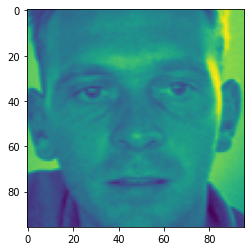

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

x = temp[500][-1].split(' ')
x = np.array(x)
x = x.astype(np.uint8)
x.shape
x = np.reshape(x,(96,96))
data = Image.fromarray(x) 
plt.imshow(data)
plt.show()

In [ ]:
train_data.head

<bound method NDFrame.head of       left_eye_center_x  ...                                              Image
0             66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1             64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2             65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3             65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4             66.725301  ...  147 148 160 196 215 214 216 217 219 220 206 18...
...                 ...  ...                                                ...
7044          67.402546  ...  71 74 85 105 116 128 139 150 170 187 201 209 2...
7045          66.134400  ...  60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046          66.690732  ...  74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047          70.965082  ...  254 254 254 254 254 238 193 145 121 118 119 10...
7048          66.938311  ...  53 62 67 76 86 91 97 105 105 106 107 108 112 1...

[7049 row

In [ ]:
train_data.isnull().sum().sort_values(ascending = False)

left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
right_eyebrow_inner_end_y    4779
right_eyebrow_inner_end_x    4779
mouth_right_corner_x         4779
mouth_right_corner_y         4779
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_y              10
left_eye_center_x              10
nose_tip_x                      0
nose_tip_y    

In [ ]:
len(train_data)

7049

In [ ]:
train_data.isnull().any().value_counts()
# this shows that 28 columns contain problem of missing values

True     28
False     3
dtype: int64

In [ ]:
train_data.isnull().any()

left_eye_center_x             True
left_eye_center_y             True
right_eye_center_x            True
right_eye_center_y            True
left_eye_inner_corner_x       True
left_eye_inner_corner_y       True
left_eye_outer_corner_x       True
left_eye_outer_corner_y       True
right_eye_inner_corner_x      True
right_eye_inner_corner_y      True
right_eye_outer_corner_x      True
right_eye_outer_corner_y      True
left_eyebrow_inner_end_x      True
left_eyebrow_inner_end_y      True
left_eyebrow_outer_end_x      True
left_eyebrow_outer_end_y      True
right_eyebrow_inner_end_x     True
right_eyebrow_inner_end_y     True
right_eyebrow_outer_end_x     True
right_eyebrow_outer_end_y     True
nose_tip_x                   False
nose_tip_y                   False
mouth_left_corner_x           True
mouth_left_corner_y           True
mouth_right_corner_x          True
mouth_right_corner_y          True
mouth_center_top_lip_x        True
mouth_center_top_lip_y        True
mouth_center_bottom_

In [ ]:
#filling the missing values with the previous values in that row.
#train_data.fillna(method = 'ffill',inplace = True)
train_data = train_data.dropna() 

In [ ]:
print(train_data.iloc[4000])

IndexError: ignored

In [ ]:
train_data['Image']

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
2277    191 191 191 190 189 185 184 120 54 34 19 24 31...
2278    19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2281    31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2282    7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2283    68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...
Name: Image, Length: 2140, dtype: object

In [ ]:
x_train = []
for i in train_data['Image']:
    x = i.split(' ')
    x = np.array(x)
    #x = x.astype(np.uint8)
    x = x.astype('float32')
    x = np.reshape(x,(96,96))
    x_train.append(x)


In [ ]:
x_t = np.array(x_train)

In [ ]:
np.mean(x_t)

121.06313

In [ ]:
x_t.shape

(2140, 96, 96)

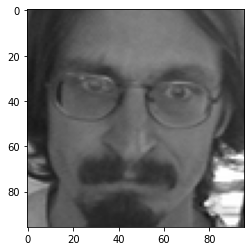

In [ ]:
x_t[1]
data = Image.fromarray(x_t[512]) 
plt.imshow(data)
plt.show()

In [ ]:
temp = train_data.to_numpy()

In [ ]:
y_test = [] #temp[:][:30]
for i in temp:
    y_test.append(i[0:30])
y_test = np.array(y_test)
y_test = y_test.astype(np.float32)

In [ ]:
y_test[0]

array([66.03356 , 39.002274, 30.227007, 36.421677, 59.582077, 39.647423,
       73.13035 , 39.969997, 36.35657 , 37.3894  , 23.452871, 37.3894  ,
       56.953262, 29.033648, 80.22713 , 32.228138, 40.227608, 29.002321,
       16.356379, 29.64747 , 44.42057 , 57.066803, 61.19531 , 79.97017 ,
       28.614496, 77.38899 , 43.312603, 72.935455, 43.130707, 84.48577 ],
      dtype=float32)

In [ ]:
y_test.shape

(2140, 30)

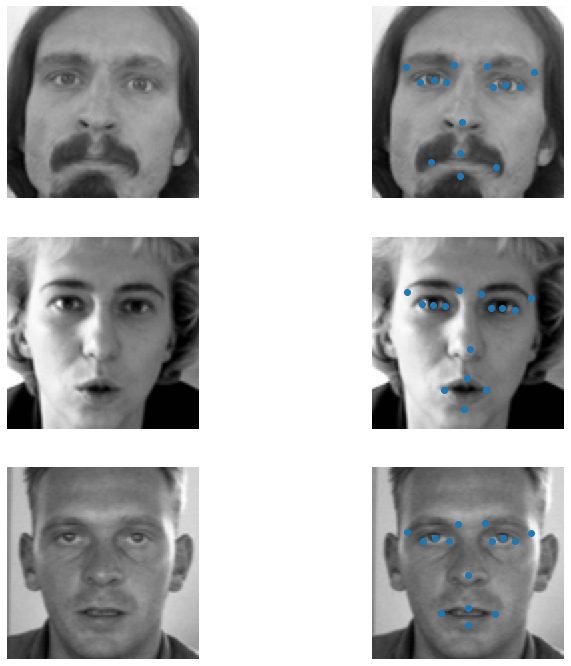

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_image(X, Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        if 0 < Y[i+1] < IMAGE_HEIGHT and 0 < Y[i] < IMAGE_WIDTH:
            img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])


nrows = 3
ncols = 2
pic_index = 0
fig = plt.gcf() 
fig.set_size_inches(ncols * 6, nrows * 4) # just for enlargment of data  
pic_index += 8
# code to take 8 files and apply there annotations there itself:
d1 = np.copy(x_t)
d2 = np.copy(y_test)
k = 0
for imgi,annot in zip(d1[:3],d2[:3]):
    # normal image
    sp = plt.subplot(nrows, ncols, k + 1) 
    sp.axis('Off') 
    k += 1
    #img = plt.imread(imgi)
    plt.imshow(imgi,cmap = 'gray')

    # image with annotations
    sp = plt.subplot(nrows, ncols, k + 1) 
    sp.axis('Off') 
    k += 1
    img_c = imgi
    plt.imshow(img_c,cmap = 'gray')
    plt.scatter(annot[0:30:2],annot[1:30:2])

plt.show()

In [ ]:
import tensorflow as tf
model_layers = [ 
    tf.keras.layers.Conv2D( 128 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid' ),
]
model = tf.keras.Sequential( model_layers )

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 92, 92, 128)       3328      
_________________________________________________________________
batch_normalization_8 (Batch (None, 92, 92, 128)       512       
_________________________________________________________________
activation_8 (Activation)    (None, 92, 92, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 88, 88, 128)       409728    
_________________________________________________________________
batch_normalization_9 (Batch (None, 88, 88, 128)       512       
_________________________________________________________________
activation_9 (Activation)    (None, 88, 88, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 84, 84, 128)      

In [ ]:
#model.fit(X_train,y_test,epochs = 50,batch_size = 256,validation_split = 0.2)
#record = model.fit(x/255.,y_test,epochs = 100)
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.00003 ) , metrics=[ 'mae' ] )
x = x_t.reshape(-1,96,96,1)
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))
record = model.fit((x)/255., (y_test-np.mean(y_test))/(np.max(y_test) - np.min(y_test)), batch_size=64 , epochs=350, validation_split=0.2)

Epoch 1/350
27/27 [==============================] - 1s 26ms/step - loss: 0.0121 - acc: 0.5602 - val_loss: 0.0037 - val_acc: 0.4322
Epoch 2/350
27/27 [==============================] - 1s 19ms/step - loss: 0.0013 - acc: 0.7734 - val_loss: 0.0029 - val_acc: 0.4322
Epoch 3/350
27/27 [==============================] - 1s 19ms/step - loss: 0.0010 - acc: 0.7728 - val_loss: 0.0032 - val_acc: 0.4322
Epoch 4/350
27/27 [==============================] - 1s 19ms/step - loss: 8.6708e-04 - acc: 0.7722 - val_loss: 0.0028 - val_acc: 0.4322
Epoch 5/350
27/27 [==============================] - 1s 19ms/step - loss: 7.5983e-04 - acc: 0.7716 - val_loss: 0.0023 - val_acc: 0.4346
Epoch 6/350
27/27 [==============================] - 1s 19ms/step - loss: 6.8249e-04 - acc: 0.7769 - val_loss: 0.0022 - val_acc: 0.4439
Epoch 7/350
27/27 [==============================] - 1s 19ms/step - loss: 6.0365e-04 - acc: 0.7856 - val_loss: 0.0021 - val_acc: 0.4439
Epoch 8/350
27/27 [==============================] - 1s 19ms

## Testing on images :

In [ ]:
# testing on a real image : 
import cv2
im = cv2.imread('test_img_.jpg')
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #cv2.COLOR_BGR2RGB   # BGR -> RGB
img = cv2.resize(img,(96,96))

In [ ]:
image = np.array(img)
image

array([[ 89,  50,  34, ...,   7,   9,  16],
       [ 78,  46,  29, ...,   6,  10,  23],
       [ 64,  33,  17, ...,   9,  16,  37],
       ...,
       [255, 255, 255, ..., 252, 251, 251],
       [255, 255, 255, ..., 253, 253, 252],
       [255, 255, 255, ..., 254, 254, 253]], dtype=uint8)

In [ ]:
image = image.reshape(1,96,96,1)

In [ ]:
image.shape

(1, 96, 96, 1)

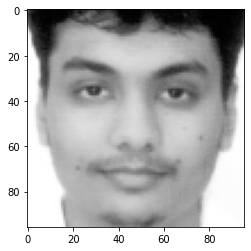

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(np.array(img),cmap = 'gray')
plt.show()

In [ ]:
o_p = model.predict((image)/255.)
print(o_p)

[[[[0.6845554  0.38671616 0.2913762  0.41091517 0.6033503  0.39586592
    0.74693906 0.41404697 0.36643746 0.39976737 0.23383586 0.42547995
    0.5813872  0.27417266 0.810278   0.28407356 0.40365067 0.3368459
    0.15802227 0.35111153 0.49350592 0.6031684  0.67554694 0.77551067
    0.32643047 0.7987774  0.50454366 0.7388995  0.49770412 0.86115474]]]]


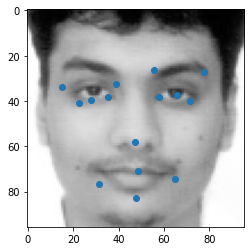

In [ ]:
# %matplotlib inline
# import random # to shuffle the data
# import matplotlib.pyplot as plt
plt.imshow(np.array(img),cmap = 'gray')
tp = o_p.reshape(30,1)
tp = tp*96 # + np.mean(y_test)
plt.scatter(tp[0:30:2] ,tp[1:30:2])
plt.show()

### Testing on a dataset image 

In [ ]:
i = np.array(x_t[214])
t = model.predict(i.reshape(-1,96,96,1)/255.)

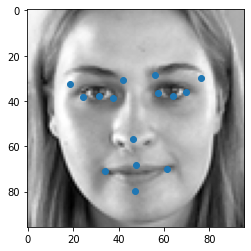

In [ ]:
plt.imshow(i,cmap = 'gray')
tp = t.reshape(30,1)
tp = tp*96
plt.scatter(tp[0:30:2],tp[1:30:2])
plt.show()